In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import mapclassify

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Combine the Census and EPC data together into a spatial object and quick explore

In [2]:
census = pd.read_csv('./../Data/census/2021/OA_combined_data_refined.csv').drop(columns = {'Unnamed: 0'})
cluster = pd.read_csv('./../Data/Clusters_EfficiencyinPRS/OA_clusters_9.csv').drop(columns = {'Unnamed: 0'})
oa_house_area = pd.read_csv('./../Data/Energy_Performance_Certificate/OA_house_area_from_epc.csv').drop(columns = {'Unnamed: 0'}).rename(columns= {'oa21cd':'OA21CD'})
lad_house_area = pd.read_csv('./../Data/Energy_Performance_Certificate/LAD_house_area_from_epc.csv').drop(columns = {'Unnamed: 0'})
OA = gpd.read_file('./../Data/boundaries/Output_Areas/Output_Areas_Dec_2021_Boundaries_Generalised_Clipped_EW_BGC_2022_-5131276949491721609.geojson')
LA = gpd.read_file('../Data/boundaries/Output_Areas/LAD_Dec_2021_GB_BFC_2022_-8975151699474964544.geojson')
lookup = pd.read_csv('../Data/boundaries/Output_Areas/OA_LAD_lookup.csv').drop(columns = {'Unnamed: 0'}).merge(LA.loc[:,['LAD21CD','LAD21NM']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Columns: 106 entries, OA21CD to N_immigrants_arrived_after18_rate_P
dtypes: float64(50), int64(55), object(1)
memory usage: 152.8+ MB


oa_house_area.sort_values(['median_house_area'], ascending = True).reset_index().drop(columns={'index'}).plot()
oa_house_area.sort_values(['median_house_area'], ascending = True).reset_index().drop(columns={'index','max_house_area','min_house_area','count_houses'}).plot()

In [4]:
test1 = oa_house_area.sort_values(['median_house_area'], ascending = True).reset_index().drop(columns={'index'})
test1['diff'] = test1['median_house_area'] - test1['mean_house_area']
test1 = test1.merge(lookup, on = 'OA21CD', how = 'left')
test1 = test1[~test1['LAD21CD'].isna()]
test1

,OA21CD,mean_house_area,median_house_area,max_house_area,min_house_area,count_houses,diff,LAD21CD,LAD21NM
1,E00178799,17.089327,0.0,90.18,0.0,104,-17.089327,E09000003,Barnet
2,E00179061,29.383333,2.0,101.00,0.0,60,-27.383333,E09000005,Brent
3,E00167051,41.479756,14.0,288.00,14.0,123,-27.479756,E07000008,Cambridge
4,E00173501,21.641487,16.0,161.00,12.0,854,-5.641487,E06000018,Nottingham
5,W00010365,27.728456,16.0,141.00,14.0,693,-11.728456,W06000011,Swansea
...,...,...,...,...,...,...,...,...,...
188832,E00010064,601.713750,505.0,2279.00,56.0,80,-96.713750,E09000014,Haringey
188833,E00154587,514.314778,510.5,1123.00,155.0,90,-3.814778,E07000207,Elmbridge
188834,E00154797,591.204447,523.0,1690.00,18.0,103,-68.204447,E07000207,Elmbridge
188835,E00154799,631.968495,529.0,2137.00,40.0,93,-102.968495,E07000207,Elmbridge


In [5]:
test2 = lad_house_area.sort_values(['median_house_area'], ascending = True).reset_index().drop(columns={'index'})
test2['diff'] = test2['median_house_area'] - test2['mean_house_area']
test2

,LAD21CD,mean_house_area,median_house_area,max_house_area,min_house_area,count_houses,diff
0,S12000014,36.000000,36.0,36.0,36.0,1,0.000000
1,S12000036,41.800000,40.0,59.0,28.0,40,-1.800000
2,S12000034,49.666667,42.0,72.0,35.0,3,-7.666667
3,S12000035,44.000000,44.0,46.0,42.0,2,0.000000
4,S12000049,46.333333,46.0,58.0,35.0,3,-0.333333
...,...,...,...,...,...,...,...
343,E07000030,111.960603,93.0,1702.0,0.0,17811,-18.960603
344,W06000008,107.444787,93.0,1503.0,0.0,22007,-14.444787
345,S12000006,116.468421,93.5,496.0,29.0,190,-22.968421
346,S12000017,103.000000,103.0,103.0,103.0,1,0.000000


In [8]:
test1

,OA21CD,mean_house_area,median_house_area,max_house_area,min_house_area,count_houses,diff,LAD21CD,LAD21NM
0,E00178799,17.089327,0.00,90.18,0.0,104,-17.089327,E09000003,Barnet
2,E00179061,29.383333,2.00,101.00,0.0,60,-27.383333,E09000005,Brent
3,E00167051,41.233417,14.00,288.00,14.0,120,-27.233417,E07000008,Cambridge
4,E00173501,21.762929,16.00,161.00,12.0,857,-5.762929,E06000018,Nottingham
5,E00168021,21.418991,16.00,160.00,11.0,109,-5.418991,E09000028,Southwark
...,...,...,...,...,...,...,...,...,...
181992,E00154799,631.172796,528.01,2137.00,40.0,93,-103.162796,E07000207,Elmbridge
181993,E00154797,593.918216,528.50,1690.00,18.0,102,-65.418216,E07000207,Elmbridge
181994,E00100027,531.000000,531.00,940.00,122.0,2,0.000000,E07000038,North East Derbyshire
181995,E00154777,572.672021,551.95,1210.00,62.0,96,-20.722021,E07000207,Elmbridge


In [6]:
test3 = test1.loc[test1['LAD21NM'].isin(test1['LAD21NM'].unique()[0:3])]

In [7]:
list_lad = test3['LAD21NM'].unique()

test3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 1 to 188824
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OA21CD             2433 non-null   object 
 1   mean_house_area    2433 non-null   float64
 2   median_house_area  2433 non-null   float64
 3   max_house_area     2433 non-null   float64
 4   min_house_area     2433 non-null   float64
 5   count_houses       2433 non-null   int64  
 6   diff               2433 non-null   float64
 7   LAD21CD            2433 non-null   object 
 8   LAD21NM            2433 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 190.1+ KB


In [8]:
LAD2 = LA.merge(test2, on = 'LAD21CD', how = 'left')
OA2 = OA.merge(test1, on = 'OA21CD', how = 'left')
LAD2

,OBJECTID,LAD21CD,LAD21NM,LAD21NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,mean_house_area,median_house_area,max_house_area,min_house_area,count_houses,diff
0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.67614,cb7275ce-d16e-45f7-8e7d-33032fb9df9d,"MULTIPOLYGON (((450154.600 525938.201, 450140....",89.992890,80.00,40429.28,0.00,31974.0,-9.992890
1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.54467,6598062e-357c-4e8d-b117-5d6de45f75b7,"MULTIPOLYGON (((446854.700 517192.700, 446854....",82.770229,78.00,684.00,0.00,47187.0,-4.770229
2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.56752,b23f8b9b-4d88-4c21-80d6-8041e2910ef2,"MULTIPOLYGON (((451747.397 520561.100, 451792....",86.096735,80.46,1941.00,3.00,41708.0,-5.636735
3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.55691,64624aef-6611-4e3c-bba8-870b0b889e1d,"MULTIPOLYGON (((447177.704 517811.797, 447176....",88.864306,82.00,1143.00,0.00,61652.0,-6.864306
4,5,E06000005,Darlington,,428029,515648,-1.56835,54.53534,310b13b3-f45f-452b-88f1-ddd48c1992f5,"POLYGON ((423496.602 524724.299, 423497.204 52...",88.173604,79.24,1538.47,0.00,35429.0,-8.933604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,359,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.69836,5236d7c9-0915-4b85-892f-e20c75a88af6,"POLYGON ((323898.201 211287.499, 324115.698 21...",86.109716,82.00,999.00,0.00,26083.0,-4.109716
359,360,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.77827,de1a5dcb-a91e-40bf-b3b3-3e13eed9203f,"MULTIPOLYGON (((345897.698 180999.599, 345884....",106.722599,89.00,2630.00,2.54,26815.0,-17.722599
360,361,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.58231,a1ae351c-86e5-4cd8-9a76-88563a52c817,"MULTIPOLYGON (((334186.001 192669.398, 334201....",88.884109,82.00,6886.10,0.00,47900.0,-6.884109
361,362,W06000023,Powys,Powys,302329,273255,-3.43531,52.34864,5cb7e231-ad03-40d5-9f64-1e0fbeb6db4b,"MULTIPOLYGON (((270499.000 297829.350, 270658....",106.752062,89.05,1993.73,0.00,38977.0,-17.702062


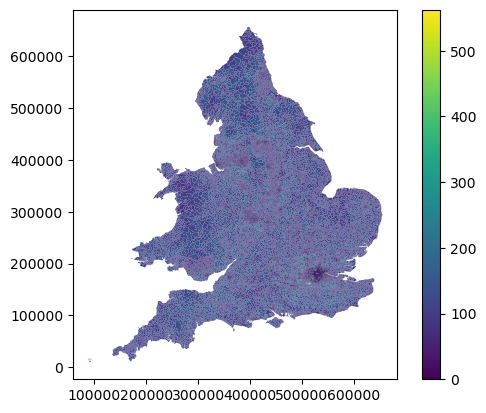

In [9]:
OA2.plot(column = 'median_house_area', legend = True);

In [10]:
OA2 = OA2.merge(census.loc[:,['OA21CD','Total_N_residents']], on = 'OA21CD', how = 'left')
OA2['pop_household_density_mean'] = OA2['Total_N_residents']/OA2['mean_house_area']
OA2['pop_household_density_median'] = OA2['Total_N_residents']/OA2['median_house_area']
OA2.head()

,OBJECTID,OA21CD,GlobalID,geometry,mean_house_area,median_house_area,max_house_area,min_house_area,count_houses,diff,LAD21CD,LAD21NM,Total_N_residents,pop_household_density_mean,pop_household_density_median
0,1,E00000001,bc5eb21b-d42b-4715-a771-2c27575a08f0,"POLYGON ((532303.492 181814.110, 532213.378 18...",109.965588,109.955,130.12,95.00,34.0,-0.010588,E09000001,City of London,176,1.600501,1.600655
1,2,E00000003,a1a2b34f-320e-4bb8-acb4-7ca7ca16ef9c,"POLYGON ((532213.378 181846.192, 532190.539 18...",108.285882,106.385,154.50,84.20,34.0,-1.900882,E09000001,City of London,256,2.364112,2.406354
2,3,E00000005,9337da1a-fe0f-4210-9c95-ed2d20fd6287,"POLYGON ((532180.131 181763.020, 532219.161 18...",69.213679,71.000,252.00,24.52,106.0,1.786321,E09000001,City of London,112,1.618177,1.577465
3,4,E00000007,b336e11f-af26-48a6-ac67-44f5b8b8840a,"POLYGON ((532201.292 181668.180, 532267.728 18...",57.875889,53.000,122.80,27.39,73.0,-4.875889,E09000001,City of London,144,2.488083,2.716981
4,5,E00000010,ca8f9874-cdf5-4c1a-9d39-f74a410dae44,"POLYGON ((532127.958 182133.192, 532089.264 18...",43.223068,39.750,109.52,34.62,88.0,-3.473068,E09000001,City of London,178,4.118171,4.477987


/opt/anaconda3/envs/env01/lib/python3.9/site-packages/mapclassify/classifiers.py:894: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/opt/anaconda3/envs/env01/lib/python3.9/site-packages/mapclassify/classifiers.py:926: RuntimeWarning: invalid value encountered in scalar divide
  gadf = 1 - self.adcm / adam


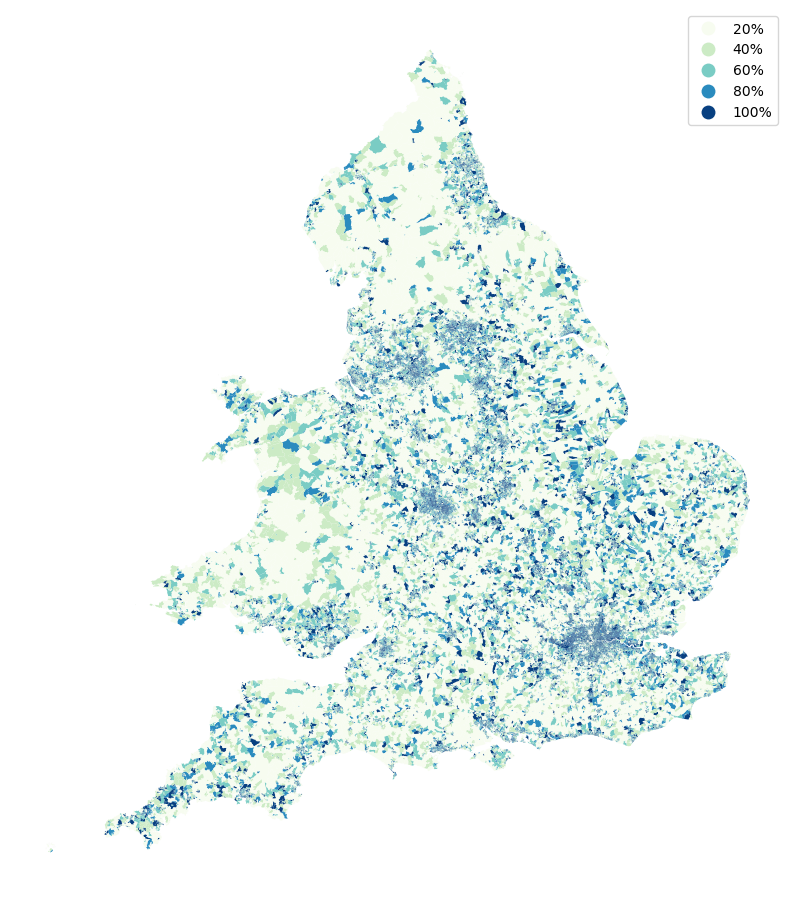

In [13]:
ax = OA2.plot(column = 'pop_household_density_median', legend = True, cmap='GnBu',scheme="quantiles",figsize=(10, 13))

ax.set_axis_off()
new_labels=[
            '20%',
            '40%',
            '60%',
            '80%',
            '100%'
]

leg = ax.get_legend()
for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)

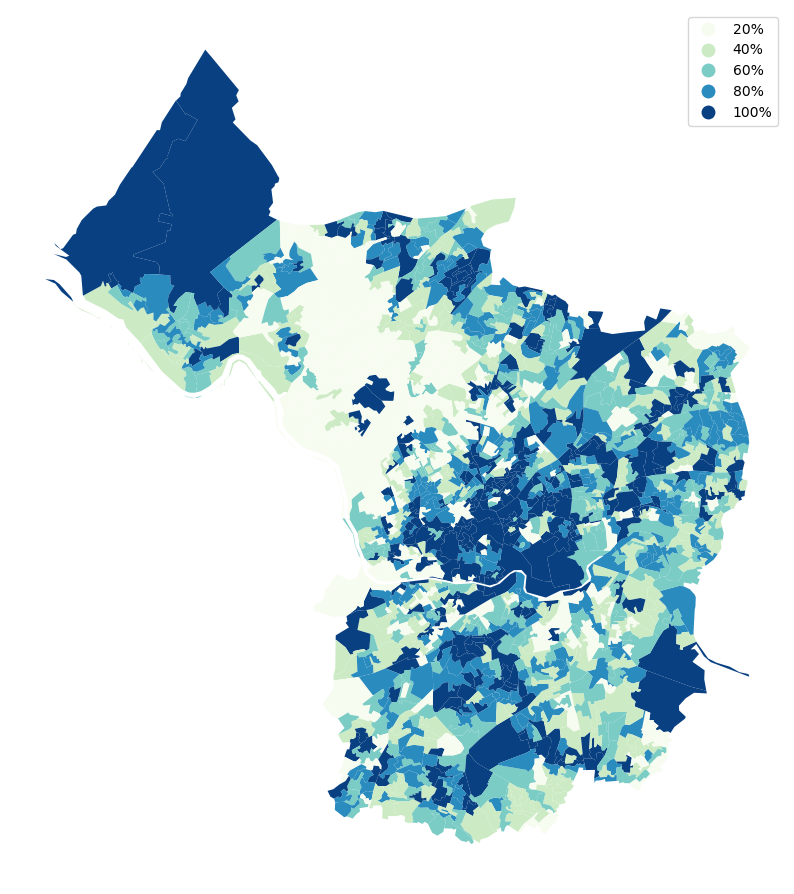

In [ ]:

ax = OA2[OA2.LAD21NM == 'Bristol, City of'].plot(column = 'pop_household_density_median', 
                                            legend = True, 
                                            cmap='GnBu',
                                            scheme="quantiles", k=5,
                                            figsize=(10, 13))

ax.set_axis_off()
new_labels=[
            '20%',
            '40%',
            '60%',
            '80%',
            '100%'
]

leg = ax.get_legend()
for text, label in zip(leg.get_texts(), new_labels):
    text.set_text(label)



In [15]:
# convert all figures into pictures
# !pip install nbconvert
# !jupyter nbconvert 04_exploring_the_pop_density.ipynb --to markdown --NbConvertApp.output_files_dir=.

[NbConvertApp] Converting notebook 04_exploring_the_pop_density.ipynb to markdown
[NbConvertApp] Support files will be in ./
[NbConvertApp] Writing 27487 bytes to 04_exploring_the_pop_density.md


In [ ]:
OA2.to_file('../Data/Energy_Performance_Certificate/OA_density.geojson')